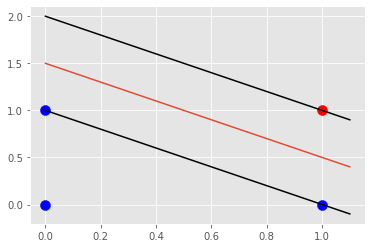

In [12]:
import matplotlib.pyplot as plt 
from matplotlib import style
import numpy as np 
from sklearn import svm







style.use('ggplot')
class SVM:
    def __init__(self,visualise = True):
        # super().__init__()
        self.visualise = visualise 
        self.colors = {1:'r',-1:'b'}
        if self.visualise:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
        self.w = None 
        self.b = None


    def fit(self,data):
        self.data = data  
        # save all magnitudeas as key and fin the minimum one 
        opt_dict = {}

        transofrm = [[1,1],
                        [-1,1],
                        [-1,-1],
                        [1,-1] ]
        all_data = []
        for yi in self.data:
        # for yi in range(len(self.data)):
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
            
        # print(all_data)

        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None

        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense:
                      self.max_feature_value * 0.001,
                      ]

                        
        #extremely expensive
        b_range_multiple = 5
        # b_range_multiple = 2


        b_multiple = 5

        latest_optimum = self.max_feature_value * 10

        for step in step_sizes :
            w = np.array([latest_optimum,latest_optimum])
            #we can do this
            optimised = False 


            while not optimised:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transofrm:
                        w_t = w*transformation
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        # 
                        # #### add a break here later..
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    #print(xi,':',yi*(np.dot(w_t,xi)+b))
                                    
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]

                if w[0] < 0:
                    optimised = True
                    
                else:
                    w = w - step


            norms = sorted([n for n in opt_dict])

            opt_choice = opt_dict[norms[0]]

            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
            

    


    def predict(self,features):
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        if classification!=0 and self.visualise:
            self.ax.scatter(features[0],features[1],s = 200,marker = '*', c = self.colors[classification])

        return classification

    def visualifucse(self,data_dick1):
        [[self.ax.scatter(x[0],x[1],s= 100,color = self.colors[i]) for x in data_dick1[i]] for i in data_dick1]

        # v = x.w+b 
        # psv = 1 
        # nsv = -1
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]

        datarange = (self.min_feature_value*0.9 , self.max_feature_value*1.1)

        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]


        #postive support vector
        psv1 = hyperplane(hyp_x_min,self.w,self.b,1)
        psv2 = hyperplane(hyp_x_max,self.w,self.b,1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2],"k")


        #negative support vector
        nsv1 = hyperplane(hyp_x_min,self.w,self.b,-1)
        nsv2 = hyperplane(hyp_x_max,self.w,self.b,-1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2],"k")


        zer1 = hyperplane(hyp_x_min,self.w,self.b,0)
        zer2 = hyperplane(hyp_x_max,self.w,self.b,0)
        self.ax.plot([hyp_x_min,hyp_x_max],[zer1,zer2])


        plt.show()


# data_dict = {-1:np.array([[1,7],
#                           [2,8],
#                           [3,8],]),
             
#              1:np.array([[5,1],
#                          [6,-1],
#                          [7,3],])}


data_di1 = { -1:np.array([[1,0],[0,0],[0,1]]),
                1:np.array([[1,1]])


}


svmobj = SVM()
svmobj.fit(data_di1)
svmobj.visualifucse(data_di1)




In [2]:
from sklearn import svm

In [4]:
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0,0,0, 1]
clf = svm.SVC(kernel = 'linear')
clf.fit(X, y)

SVC(kernel='linear')

In [6]:
clf.support_

array([1, 2, 3])

In [7]:
clf.coef_

array([[0.5, 0.5]])

In [8]:
svmobj.w

array([2., 2.])

In [9]:
clf.intercept_

array([-1.5])

In [10]:
svmobj.b

-3.0000000000000426